In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120

In [19]:
tickers = {"BTC":"BTC-USD","ETH":"ETH-USD","SP500":"^GSPC"}   # data range set
start = "2020-01-01"
end = pd.Timestamp.today().strftime("%Y-%m-%d")  #data

In [25]:
symbols = list(tickers.values())

data=yf.download(symbols, start=start, end=end, auto_adjust=False, progress=False)

if ('Close' in data.columns) or isinstance(data.columns, pd.MultiIndex):
    df_close = data['Close'].rename(columns={v:k for k,v in tickers.items()})
else:
    df.close = data[['Close']].rename(columns={'Close': list(tickers.keys())[0]})

df_close.dropna(how='all', inplace=True)

print("Data range:", df_close.index.min().date(), "to", df_close.index.max().date())
df_close.tail()

Data range: 2020-01-01 to 2025-09-14


Ticker,BTC,ETH,SP500
Date,,,
2025-09-10,113955.359375,4349.145996,6532.040039
2025-09-11,115507.539062,4461.233398,6587.470215
2025-09-12,116101.578125,4715.246094,6584.290039
2025-09-13,115950.507812,4668.179688,NaN
2025-09-14,115407.656250,4609.597656,NaN


In [27]:
df_close.to_csv("crypto_close_prices_raw.csv")
print("Saved crypto_close_price_raw.csv")

Saved crypto_close_price_raw.csv


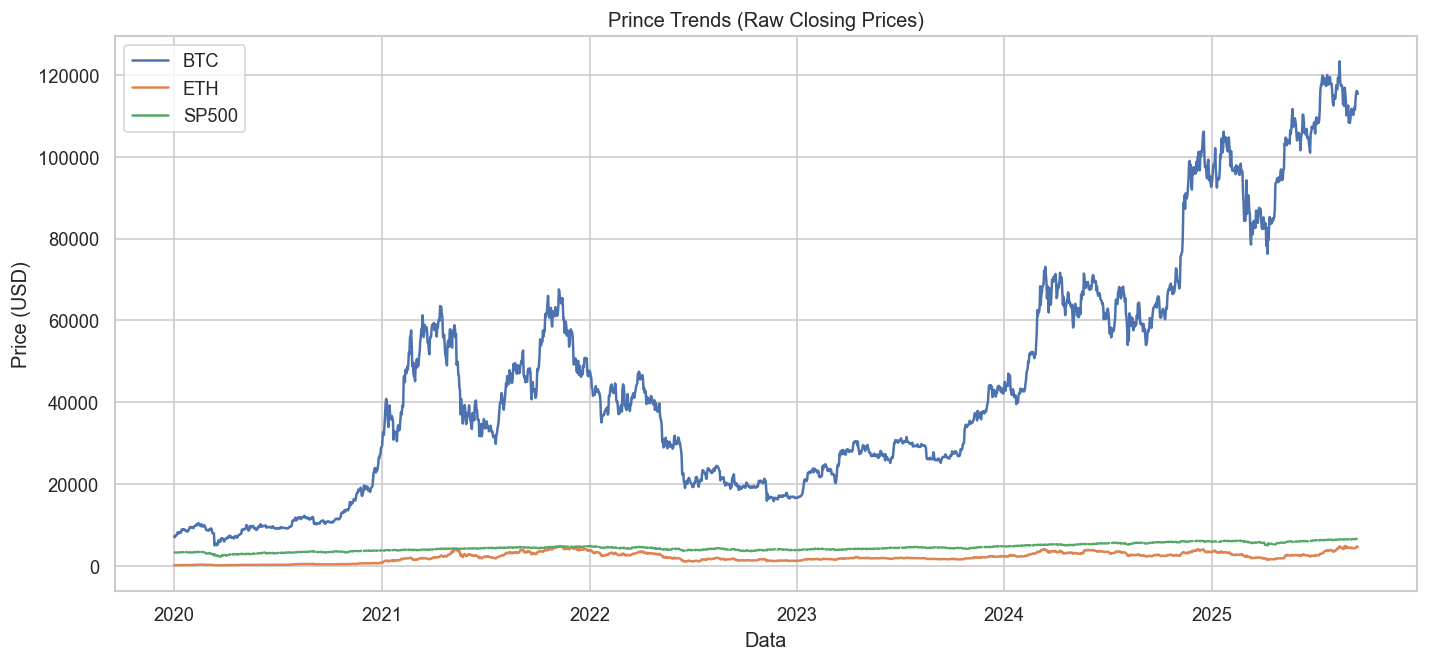

In [29]:
plt.figure(figsize=(14,6))
for col in df_close.columns:
    plt.plot(df_close.index, df_close[col], label=col, linewidth=1.5)
plt.title("Prince Trends (Raw Closing Prices)")
plt.xlabel("Data")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


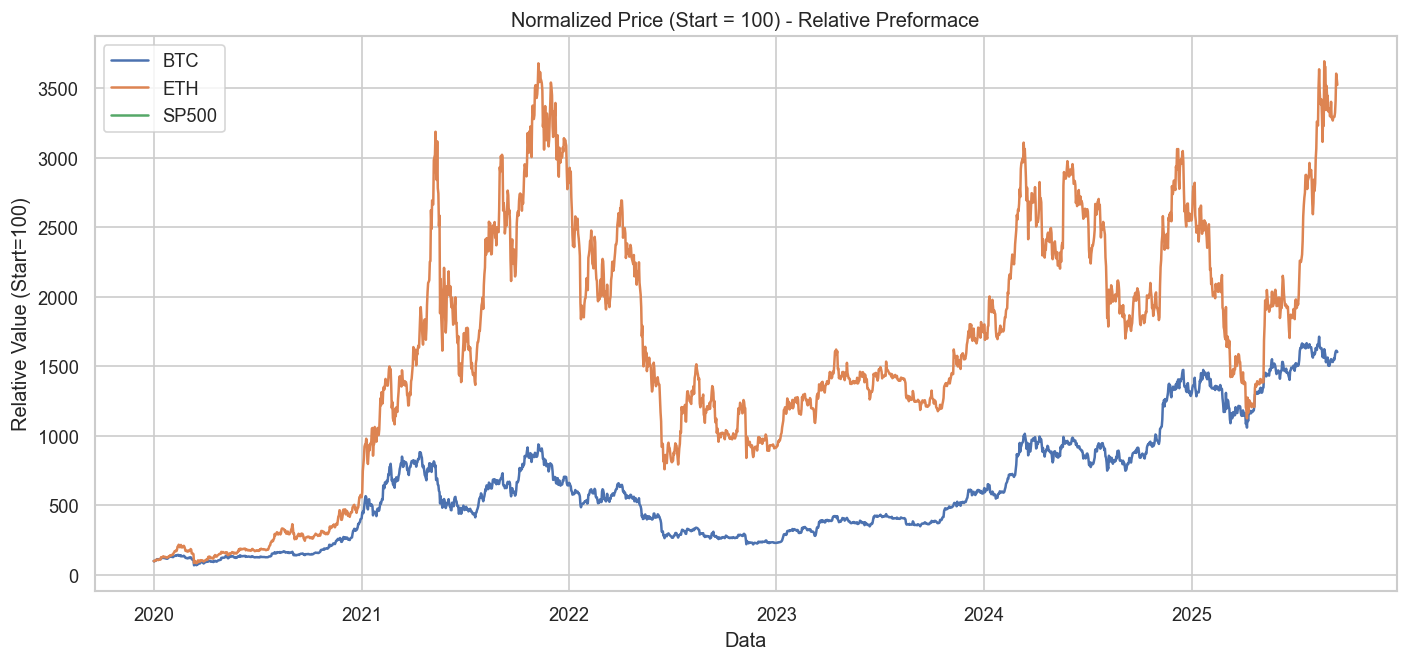

In [41]:
df_norm = df_close / df_close.iloc[0] * 100  #first Available dat = 100
plt.figure(figsize=(14,6))
for col in df_norm.columns:
    plt.plot(df_norm.index, df_norm[col], label=col)
plt.title("Normalized Price (Start = 100) - Relative Preformace")
plt.xlabel("Data")
plt.ylabel("Relative Value (Start=100)")
plt.legend()
plt.show()

Correlation matrix:
 Ticker       BTC       ETH     SP500
Ticker                              
BTC     1.000000  0.811574  0.350687
ETH     0.811574  1.000000  0.353735
SP500   0.350687  0.353735  1.000000


C:\Users\Om\AppData\Local\Temp\ipykernel_5156\3891743069.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df_close.pct_change().dropna()


<function matplotlib.pyplot.show(close=None, block=None)>

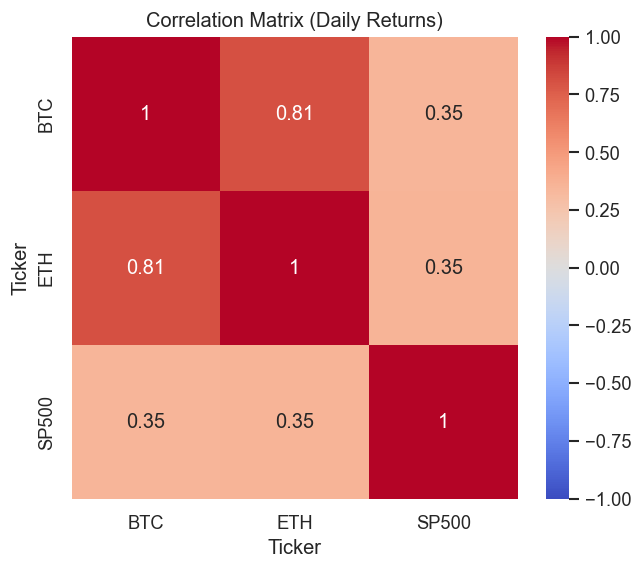

In [49]:
returns = df_close.pct_change().dropna()

corr = returns.corr()
print("Correlation matrix:\n", corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Daily Returns)")
plt.show

Daily vol: 
 Ticker
BTC      0.032371
ETH      0.043116
SP500    0.011128
dtype: float64

Annualized vol:
 Ticker
BTC      0.513870
ETH      0.684445
SP500    0.176650
dtype: float64


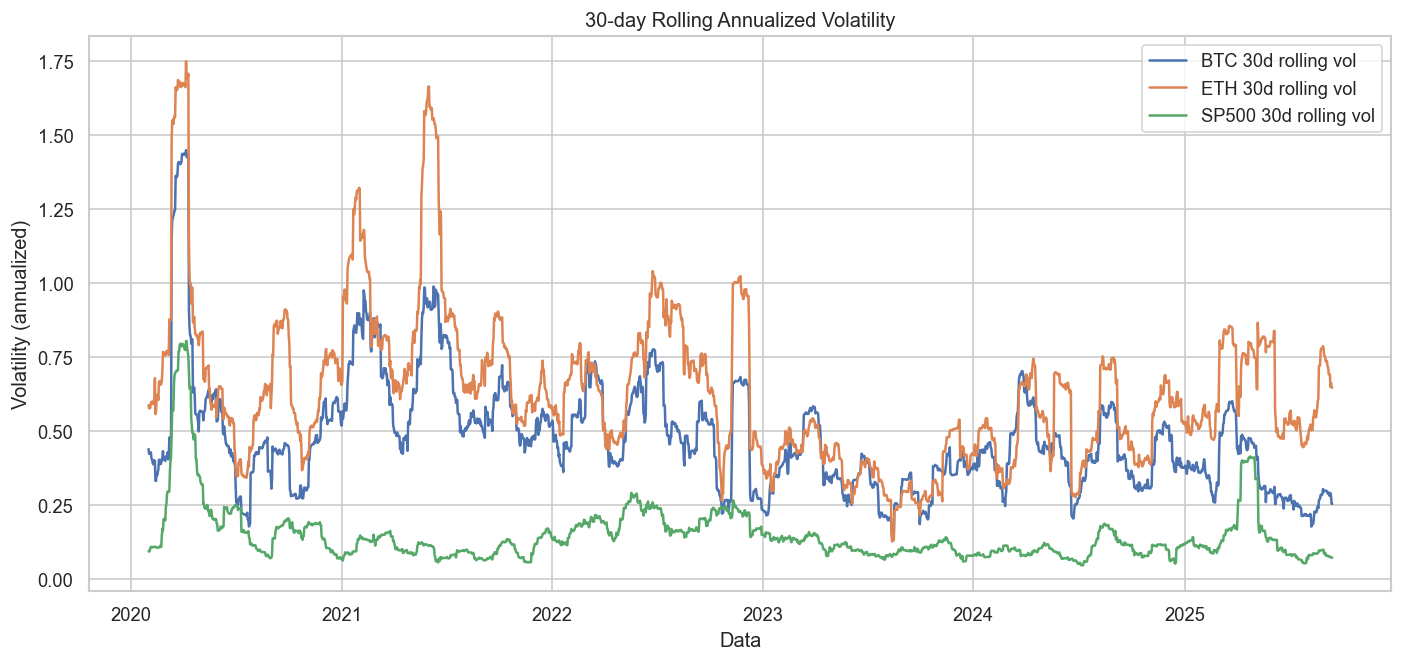

In [70]:
daily_vol = returns.std()
annualized_vol = daily_vol * np.sqrt(252)   # trading days
print("Daily vol: \n", daily_vol)
print("\nAnnualized vol:\n", annualized_vol)

rolling_window = 30
rolling_vol = returns.rolling(window=rolling_window).std() * np.sqrt(252)

plt.figure(figsize=(14,6))
for col in rolling_vol.columns:
    plt.plot(rolling_vol.index, rolling_vol[col], label=f"{col} {rolling_window}d rolling vol")
plt.legend()
plt.title(f"{rolling_window}-day Rolling Annualized Volatility")
plt.xlabel("Data")
plt.ylabel("Volatility (annualized)")
plt.show()

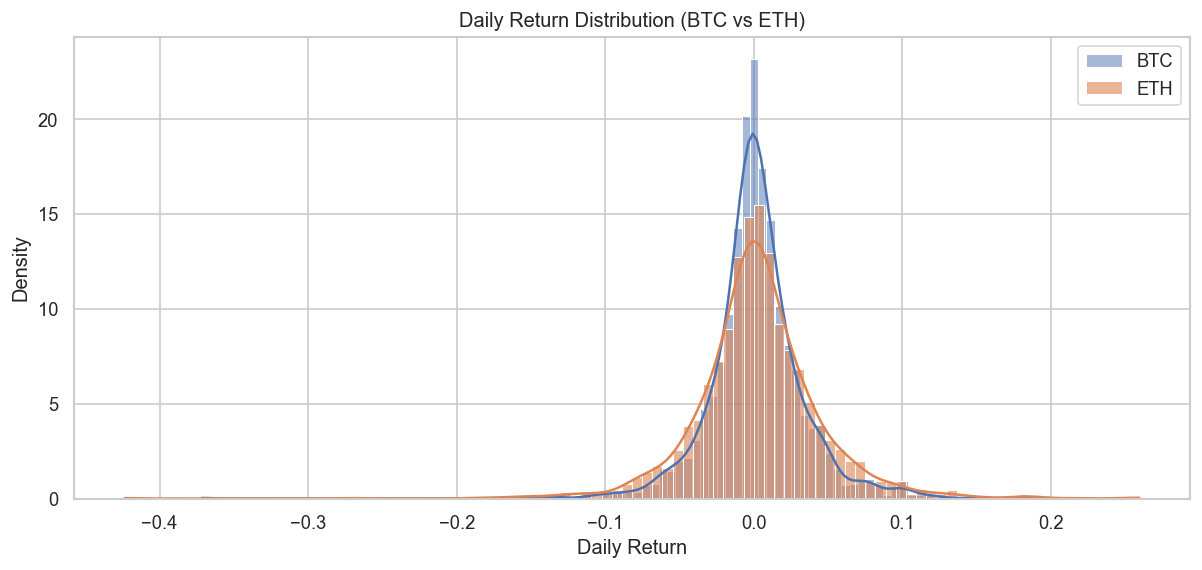

In [68]:
plt.figure(figsize=(12,5))
sns.histplot(returns['BTC'], bins=100, kde=True, stat='density', label='BTC')
sns.histplot(returns['ETH'], bins=100, kde=True, stat='density', label='ETH', alpha=0.6)
plt.legend()
plt.title("Daily Return Distribution (BTC vs ETH)")
plt.xlabel("Daily Return")
plt.show()

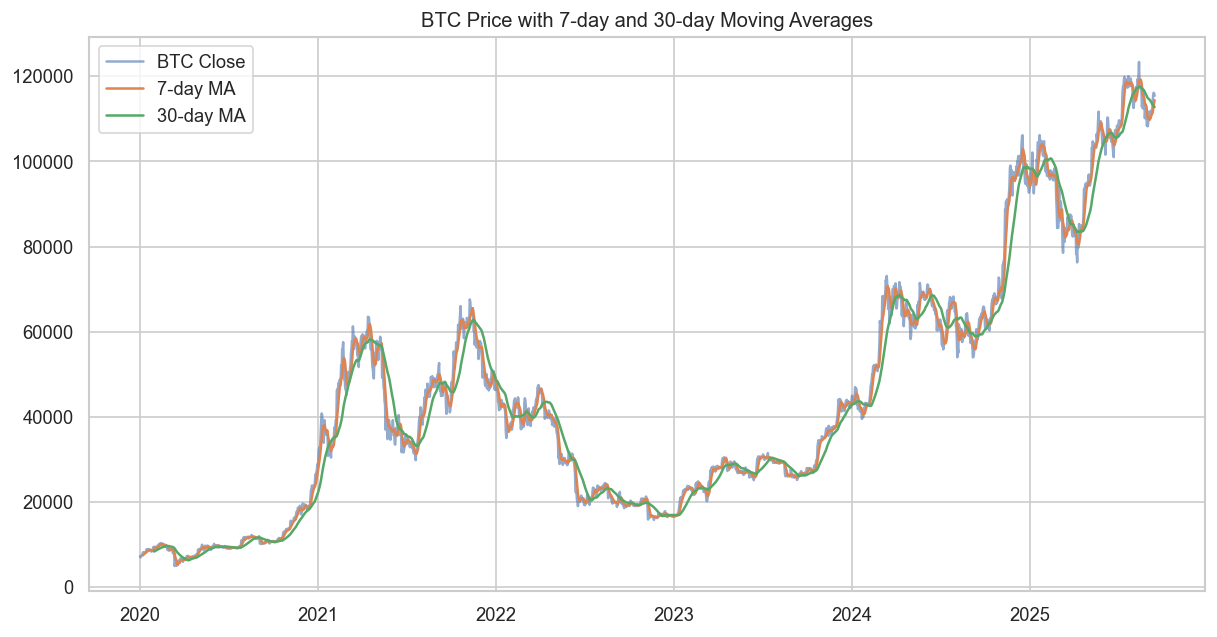

In [72]:
ma_short = df_close['BTC'].rolling(window=7).mean()
ma_long = df_close['BTC'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df_close.index, df_close['BTC'], label='BTC Close', alpha=0.6)
plt.plot(ma_short.index, ma_short, label='7-day MA')
plt.plot(ma_long.index, ma_long, label='30-day MA')
plt.legend()
plt.title("BTC Price with 7-day and 30-day Moving Averages")
plt.show()

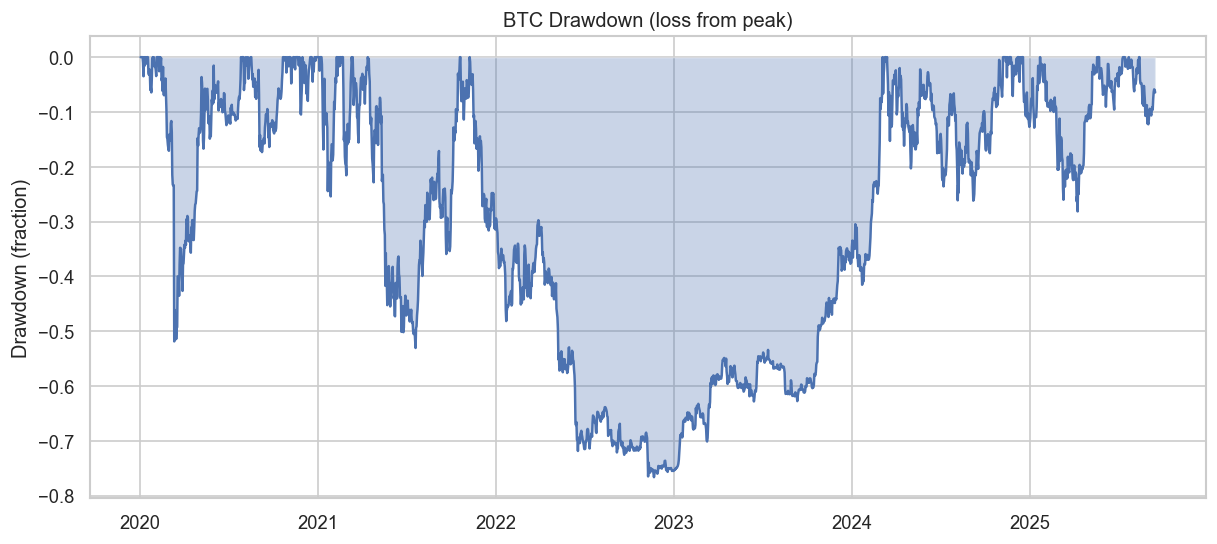

Max drawdown: -0.7663456370856905


In [78]:
cum_returns = (1 + returns['BTC']).cumprod()
running_max = cum_returns.cummax()
drawdown = (cum_returns / running_max) - 1

plt.figure(figsize=(12,5))
plt.plot(drawdown.index, drawdown, label='BTC Drawdown')
plt.fill_between(drawdown.index, drawdown, 0, alpha=0.3)
plt.title("BTC Drawdown (loss from peak)")
plt.ylabel("Drawdown (fraction)")
plt.show()

print("Max drawdown:", drawdown.min())

In [80]:
returns.to_csv("crypto_daily_returns.csv")
rolling_vol.to_csv("crypto_rolling_vol_30d.csv")
print("Saved CSVs for returns and rolling volatility.")


Saved CSVs for returns and rolling volatility.
